# **Natural Language Processing (NLP) Analysis of Messi**

## **Exploring Public Sentiment and Topics**

This notebook is the first step in analyzing public conversations about Lionel Messi following Argentina's performance in the 2018 FIFA World Cup. The overarching goal of this project is to answer whether a societal divide (or "grieta") exists around Messi, as claimed by a sponsor who questioned the public perception of associating their brand with Messi's image.

### **Why This Notebook Is Important**
To validate or refute the hypothesis of polarization, this notebook focuses on foundational text analysis techniques to:

1. **Understand the Nature of the Conversations**:
   - Analyze word frequencies to uncover dominant terms and phrases.
   - Compute TF-IDF scores to highlight unique language patterns across subsets of the data.

2. **Prepare for Topic Modeling**:
   - Through exploratory data analysis (EDA), gain insights into the structure and content of the dataset.
   - Lay the groundwork for clustering comments into distinct topics, which is critical to identifying whether positive and negative sentiment dominate separate conversational themes.

3. **Bridge Sentiment and Topics**:
   - This notebook sets the stage for linking topics and sentiment analysis, helping us determine whether polarization is reflected in distinct positive and negative topic clusters.

By systematically analyzing the text data, this notebook provides the foundational insights needed to address the key research questions of the project.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/processed/messi_comments_cleaned.csv', skipinitialspace=True)

In [4]:
df.head(10)

,_id,_index,_score,_type,page_name,raw_text,text,type,detected_language,lowercased_text,text_no_urls,text_no_special_chars,text_no_stopwords,stemmed_text
0,1.800000e+16,social__instagram__messi,1,doc,messicirque,❤️🔥🐐,NaN,instagram_comment,unknown,NaN,NaN,NaN,NaN,NaN
1,1.790000e+16,social__instagram__messi,1,doc,messicirque,💖💖,NaN,instagram_comment,unknown,NaN,NaN,NaN,NaN,NaN
2,1.800000e+16,social__instagram__messi,1,doc,messicirque,Consider coming to Chicago plz 🙏🏻,consider coming to chicago plz,instagram_comment,en,NaN,NaN,NaN,NaN,NaN
3,1.790000e+16,social__instagram__messi,1,doc,messicirque,@calcagnoc @mariolymonge,@calcagnoc @mariolymonge,instagram_comment,it,NaN,NaN,NaN,NaN,NaN
4,1.790000e+16,social__instagram__messi,1,doc,messicirque,@icriango92 daleeeeeee,@icriango92 daleeeeeee,instagram_comment,nl,NaN,NaN,NaN,NaN,NaN
5,1.790000e+16,social__instagram__messi,1,doc,messicirque,@uelinton_lima #messicirque,@uelinton_lima #messicirque,instagram_comment,it,NaN,NaN,NaN,NaN,NaN
6,1.800000e+16,social__instagram__messi,1,doc,messicirque,King of Kings @leomessi 👑,king of kings @leomessi,instagram_comment,en,NaN,NaN,NaN,NaN,NaN
7,1.800000e+16,social__instagram__messi,1,doc,messicirque,Gran Capi‼️❤️💙👑🐐🇦🇷,gran capi!!,instagram_comment,ca,NaN,NaN,NaN,NaN,NaN
8,1.800000e+16,social__instagram__messi,1,doc,messicirque,Ola mesis si quiero ganar una entrada para yo ...,ola mesis si quiero ganar una entrada para yo ...,instagram_comment,es,NaN,NaN,NaN,NaN,NaN
9,1.790000e+16,social__instagram__messi,1,doc,messicirque,👑❤️🙏🏾,NaN,instagram_comment,unknown,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(10)

,_id,_index,_score,_type,page_name,raw_text,text,type,detected_language,lowercased_text,text_no_urls,text_no_special_chars,text_no_stopwords,stemmed_text
394628,1.790000e+16,social__instagram__messi,1,doc,leomessi,Waww,waww,instagram_comment,sw,NaN,NaN,NaN,NaN,NaN
394629,1.790000e+16,social__instagram__messi,1,doc,leomessi,احبك يول,NaN,instagram_comment,ar,NaN,NaN,NaN,NaN,NaN
394630,1.790000e+16,social__instagram__messi,1,doc,leomessi,♥♥,NaN,instagram_comment,unknown,NaN,NaN,NaN,NaN,NaN
394631,1.800000e+16,social__instagram__messi,1,doc,messifans00,Leoooooo,leoooooo,instagram_comment,et,NaN,NaN,NaN,NaN,NaN
394632,1.790000e+16,social__instagram__messi,1,doc,messifans00,حبيبي احبك,NaN,instagram_comment,ar,NaN,NaN,NaN,NaN,NaN
394633,1.810000e+16,social__instagram__messi,1,doc,messifans00,👏👏👏👍,NaN,instagram_comment,unknown,NaN,NaN,NaN,NaN,NaN
394634,1.790000e+16,social__instagram__messi,1,doc,leomessi,Kdk,kdk,instagram_comment,so,NaN,NaN,NaN,NaN,NaN
394635,1.790000e+16,social__instagram__messi,1,doc,leomessi,TE AMO,te amo,instagram_comment,vi,NaN,NaN,NaN,NaN,NaN
394636,1.800000e+16,social__instagram__messi,1,doc,leomessi,GOAT!!!,goat!!!,instagram_comment,de,NaN,NaN,NaN,NaN,NaN
394637,1.800000e+16,social__instagram__messi,1,doc,messifans00,Grande Messi...sos el único Messi,grande messi...sos el unico messi,instagram_comment,pt,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['_id', '_index', '_score', '_type', 'page_name', 'raw_text', 'text',
       'type', 'detected_language', 'lowercased_text', 'text_no_urls',
       'text_no_special_chars', 'text_no_stopwords', 'stemmed_text'],
      dtype='object')

In [7]:
print ("We have {} documents in the dataset".format(df['_id'].count())) 

We have 394638 documents in the dataset


In [8]:
#Instragram accounts where the comments were extracted
df['page_name'].unique()

array(['messicirque', 'lionelmessihdi', 'leomessi', 'extra10time',
       'allbarcahd', 'messipics', 'messifans00'], dtype=object)

In [9]:
#Type of documents in the dataset
df['type'].value_counts()

instagram_comment    394638
Name: type, dtype: int64

In [10]:
#Comments by page
df.loc[df['type']=='instagram_comment']['page_name'].value_counts()

leomessi          392796
messicirque         1585
messifans00          101
lionelmessihdi        62
extra10time           54
allbarcahd            20
messipics             20
Name: page_name, dtype: int64

In [11]:
#I'll keep only the documents with text available after cleaning
df_analisis = df[df['text'].notnull()]

## EDA
Exploring the dataset to understand the conversation

In [12]:
# Analisis Tf-idf y NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF

# Printing cool stuff
from stop_words import get_stop_words

In [13]:
stop_words_sp = get_stop_words("es")
stop_words_en = get_stop_words("en")

In [14]:
#Im adding some extra stop words as I run the analysis
stop_words_extra = ['mar', 'donatodesantis', 'dia', 'hoy', 'paro', 'conmemora', 'nacimiento', 'manuel', 'belgrano','italiano', 'italianos', 'inmigrantes', 'inmigrante', 'https', 'rt', 'da', 'saramucha', 'si', 'of', 'to', 'num', 'aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'happy', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn','birthday', 'feliz', 'cumpleano', 'feliz cumpleano', 'happy birthday','stand_with_kerala', 'kerala', 'standwithkerala', 'standwithkerala', 'leomessi', 'we', 'in', 'the', 'leo', 'are', 'you','your', 'and', 'of', 'to', 'for', 'is','do',]
stop_words = stop_words_sp + stop_words_extra

## Most frequent words in corpus

In [15]:
corpus = df_analisis['text'].values

In [16]:
#I want to check for top frequen words, so I'll use CountVectorizer. I'll use ngram_range=(1, 3) to get unigrams, bigrams and trigrams
def get_top_n_words(corpus, n=None, ngram_range=(1, 3)):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

<Figure size 1500x1000 with 0 Axes>

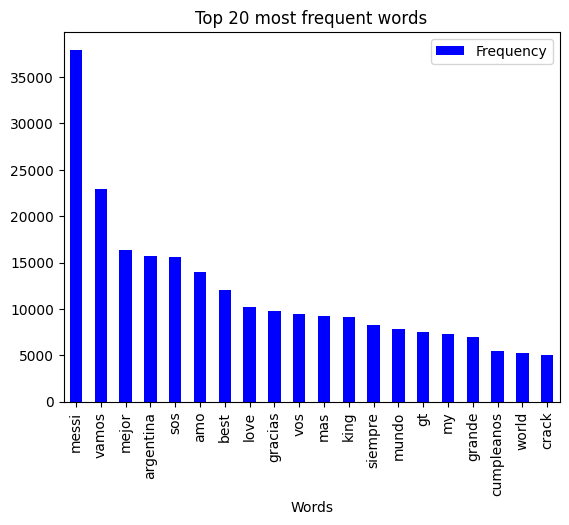

In [17]:
#I'll get the top 20 most frequent words
top_words = pd.DataFrame(get_top_n_words(corpus, n=100), columns = ["Words", "Frequency"])

#Plot
plt.figure(figsize=(15,10))
top_words.head(20).plot(kind='bar', x='Words', y='Frequency', color='blue')
plt.title('Top 20 most frequent words')
plt.show();

## Word Clouds

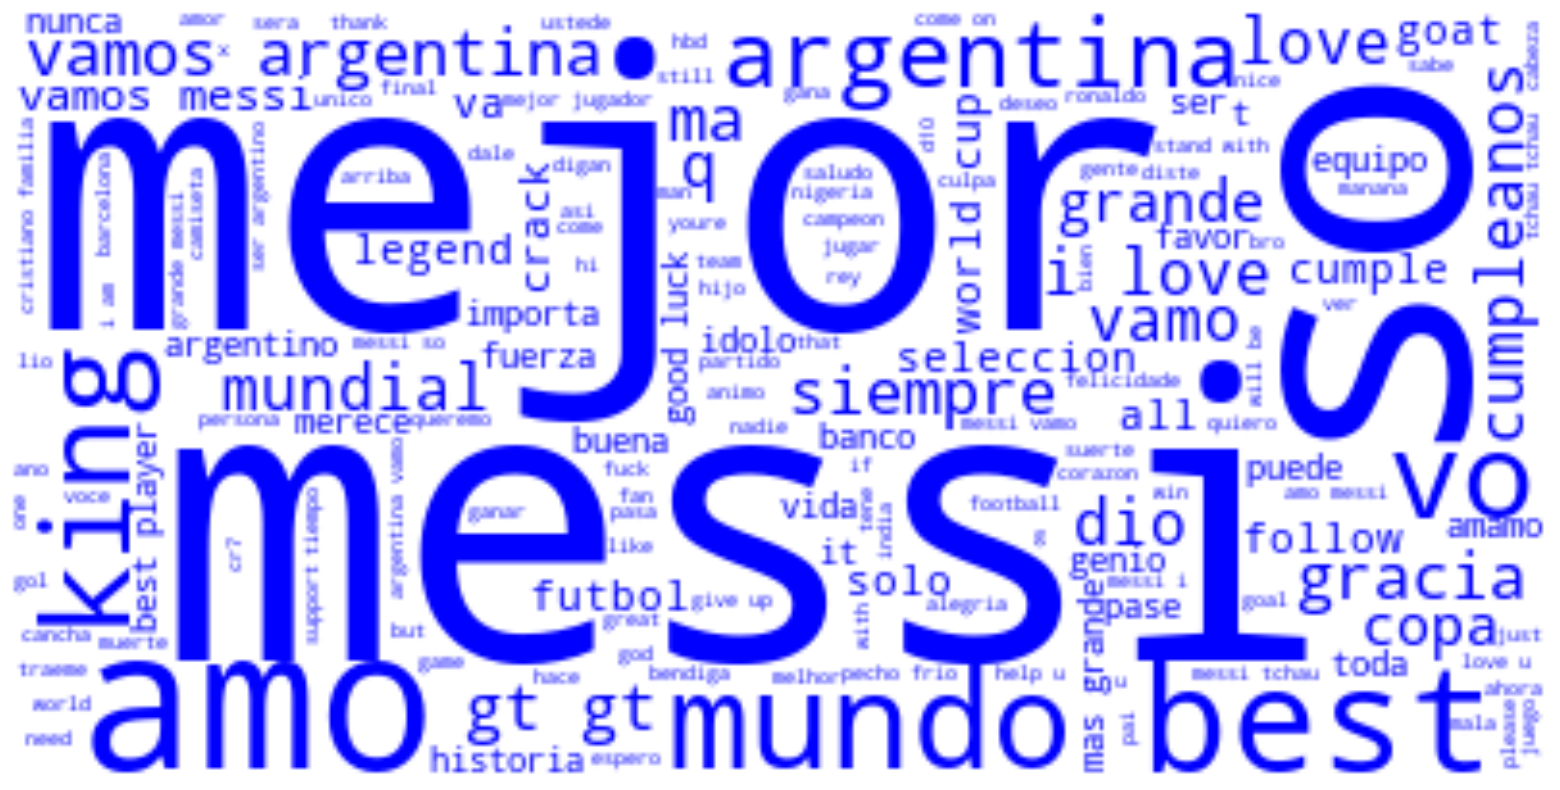

Wordcloud saved to ../results/general_corpus_wordcloud.png


<Figure size 640x480 with 0 Axes>

In [21]:
# Text for the wordcloud
word_cloud = ' '.join(df_analisis['text'])

# Create the wordcloud object
plt.figure(figsize=(20,10))
wordcloud_topwords = WordCloud(stopwords= stop_words, color_func=lambda *args, **kwargs: "blue", max_words=500, background_color="white").generate(word_cloud)
plt.imshow(wordcloud_topwords, interpolation="bilinear")
plt.axis("off")
plt.show();

results_dir = '../results'
os.makedirs(results_dir, exist_ok=True)

# Define the path to save the plot
plot_path = os.path.join(results_dir, 'general_corpus_wordcloud.png')
plt.savefig(plot_path, format='png')
print(f'Wordcloud saved to {plot_path}')

## Topic Detection

The goal is to identify the two main topics of the conversation about Messi. For this, an analysis is performed using NMF (Negative Matrix Frequency) with two vectors. The working hypothesis is that if there is polarization around the conversation about Messi, we should observe, when separating it into two topics, one with negative references and the other with positive references.

### TF-IDF

In [23]:
# Generate the vectors 
count_vect = CountVectorizer(ngram_range = (1,3), max_df = 0.8, min_df = 0.01,stop_words=stop_words, lowercase=True)
x_counts = count_vect.fit_transform(corpus)

# Generate matrix with tf-idf valuation
tfidf_transformer = TfidfTransformer(norm = 'l2')
x_tfidf = tfidf_transformer.fit_transform(x_counts)

print(x_tfidf.shape)

(277042, 46)


In [24]:
#NMF Stuffs

# impongo el número de  tópicos
dim = 2

#Instancio NMF
nmf = NMF(n_components = dim)
nmf_array = nmf.fit_transform(x_tfidf)

In [25]:
# Labels
labels = [np.argmax(x) for x in nmf_array]

In [26]:
# Componentes y nombre de los feautures
components = [nmf.components_[i] for i in range(len(nmf.components_))]
features = count_vect.get_feature_names_out().tolist()

for j in range(len(components)):

    comp = components[j]

    prior_features = sorted(features, key = lambda x: comp[features.index(x)], reverse = True)

    # Guardo en archivos los features de cada componente ordenados por prioridad y 
    # los comments asociados a cada tópico.
    fp = open('NMFComponent{}.txt'.format(j),'a')
    for k in prior_features:
        fp.write('{}, '.format(k.encode("UTF-8")))
    fp.close()
    
    
    fp = open('NMFNotes{}.txt'.format(j),'a')
    for k in range(len(labels)):
        if labels[k] == j:
            fp.write('{}, '.format(k))
    fp.close()

In [27]:
#como saqué los labels con el NMF lo agrego al dataframe
df_analisis.loc[:,'label'] = labels
df_analisis.head()

,_id,_index,_score,_type,page_name,raw_text,text,type,detected_language,lowercased_text,text_no_urls,text_no_special_chars,text_no_stopwords,stemmed_text,label
2,1.800000e+16,social__instagram__messi,1,doc,messicirque,Consider coming to Chicago plz 🙏🏻,consider coming to chicago plz,instagram_comment,en,NaN,NaN,NaN,NaN,NaN,0
3,1.790000e+16,social__instagram__messi,1,doc,messicirque,@calcagnoc @mariolymonge,@calcagnoc @mariolymonge,instagram_comment,it,NaN,NaN,NaN,NaN,NaN,0
4,1.790000e+16,social__instagram__messi,1,doc,messicirque,@icriango92 daleeeeeee,@icriango92 daleeeeeee,instagram_comment,nl,NaN,NaN,NaN,NaN,NaN,0
5,1.790000e+16,social__instagram__messi,1,doc,messicirque,@uelinton_lima #messicirque,@uelinton_lima #messicirque,instagram_comment,it,NaN,NaN,NaN,NaN,NaN,0
6,1.800000e+16,social__instagram__messi,1,doc,messicirque,King of Kings @leomessi 👑,king of kings @leomessi,instagram_comment,en,NaN,NaN,NaN,NaN,NaN,0


In [28]:
df_analisis[['_id', 'label']].groupby('label').count()

,_id
label,
0,203747
1,73295


In [29]:
#genero dataframes con los diferentes labels
nmf0 = df_analisis.loc[df_analisis['label'] == 0]
nmf1 = df_analisis.loc[df_analisis['label'] == 1]

In [30]:
#para hacer el wordcloud necesito sólo el cuerpo
nmf0_ = ' '.join(nmf0['text'])
nmf1_ = ' '.join(nmf1['text'])

## Topics: visual representation

Al generar dos únicos topicos de todos los comentarios muestrados recibidos por Messi se puede observar que se trata de un universo claramente positivo, por un lado tenemos saludos generales en inglés, y por otro lado tenemos alusiones puntuales a la selección argentina. 

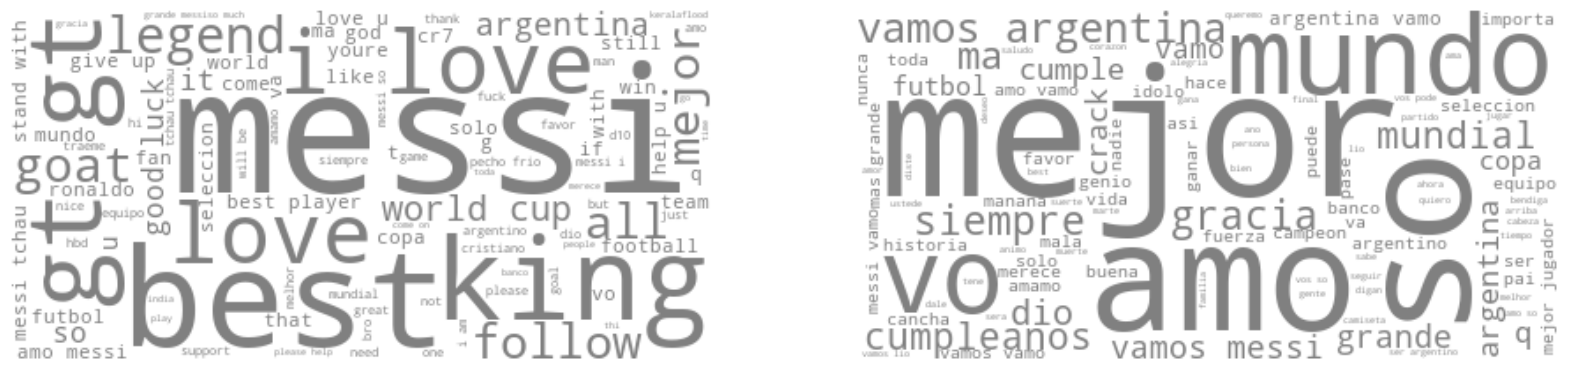

Wordclouds saved to ../results/two_clusters_wordcloud.png


<Figure size 640x480 with 0 Axes>

In [31]:
 #Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

# Generate the first word cloud
wordcloud0 = WordCloud(stopwords=stop_words, color_func=lambda *args, **kwargs: "gray", max_font_size=100, max_words=100, background_color="white").generate(nmf0_)
axes[0].imshow(wordcloud0, interpolation="bilinear")
axes[0].axis("off")  # Turn off axis

# Generate the second word cloud
wordcloud1 = WordCloud(stopwords=stop_words, color_func=lambda *args, **kwargs: "gray", max_font_size=100, max_words=100, background_color="white").generate(nmf1_)
axes[1].imshow(wordcloud1, interpolation="bilinear")
axes[1].axis("off")  # Turn off axis

# Show the plot
plt.show()

# save the plot
plot_path = os.path.join(results_dir, 'two_clusters_wordcloud.png')
plt.savefig(plot_path, format='png')
print(f'Wordclouds saved to {plot_path}')

From the resulting word cloud of the NMF with two dimensions, it can be seen that one of the resulting topics is related to affectionate greetings towards Messi in general (most of them in English), while the other topic refers to the player's relationship with the Argentine National Team and specifically has to do with positive messages.

There is no evidence for a polarization based on this data